<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/07-30/litao3_GY1_EIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install impedance -q

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px
from impedance import preprocessing
from impedance.models.circuits import CustomCircuit


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [5]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `git config --global user.email {userdata.get('email')}'
Cloning into 'gator'...
remote: Enumerating objects: 1274, done.
remote: Counting objects: 100% (564/564), done.
remote: Compressing objects: 100% (243/243), done.
remote: Total 1274 (delta 362), reused 497 (delta 314), pack-reused 710
Receiving objects: 100% (1274/1274), 81.49 MiB | 20.82 MiB/s, done.
Resolving deltas: 100% (731/731), done.
Updating files: 100% (174/174), done.


'/content'

### 18-07-24 EIS on ungated and dry sample of LiTaO3, Ycut



In [6]:
%cd "/content/gator/data/07-30/"

/content/gator/data/07-30


### High to low

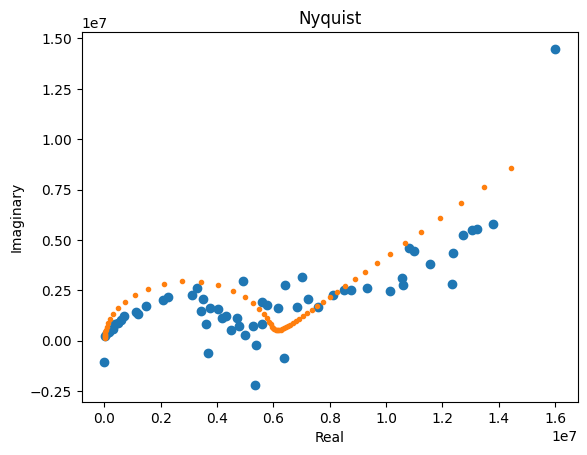

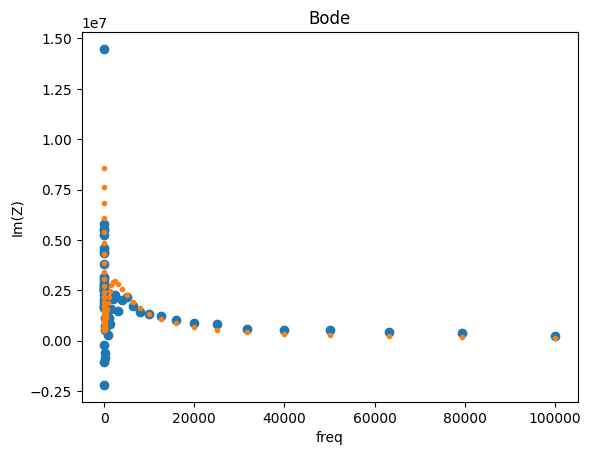

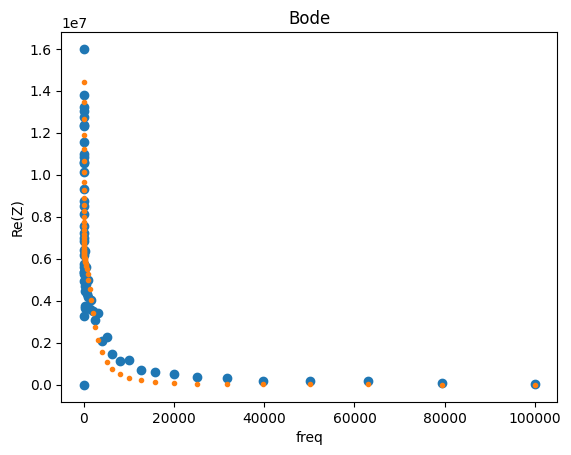

In [27]:
freqs, Z = preprocessing.readZPlot('GY1_htol.z')

circuit = 'p(R0-W0,C0)'
init = [10**6, 10**-4, 10**-10]

circuit = CustomCircuit(circuit, initial_guess=init)
circuit.fit(freqs, Z)
Z_fit = circuit.predict(freqs)


plt.plot(Z.real, -Z.imag, 'o')
plt.plot(Z_fit.real, -Z_fit.imag, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

plt.plot(freqs, -Z.imag, 'o')
plt.plot(freqs, -Z_fit.imag, '.')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

plt.plot(freqs, Z.real, 'o')
plt.plot(freqs, Z_fit.real, '.')
plt.ylabel('Re(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

In [28]:
print(circuit)


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-04 [Ohm sec^-1/2]
     C0 = 1.00e-10 [F]

Fit parameters:
     R0 = 5.84e+06  (+/- 2.20e-24) [Ohm]
     W0 = 6.80e+06  (+/- 7.04e-25) [Ohm sec^-1/2]
     C0 = 1.13e-11  (+/- 7.93e-10) [F]



In [ ]:
freqs.shape

(61,)

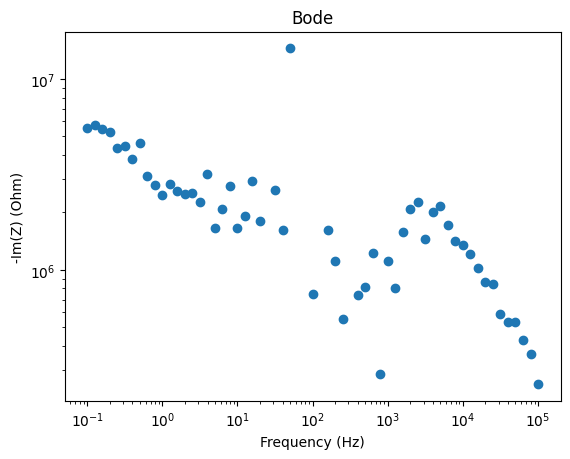

Resonance frequency: 50.11872 Hz
Resonance resistance: 15994000.0 Ohm
Estimated capacitance C0: 1.985468810171064e-10 F


In [10]:

freqs, Z = preprocessing.readZPlot('GY1_htol.z')

# Calculta omega
omega = 2 * np.pi * freqs

# Extract imaginary and real part from impedance
Z_imag = -Z.imag
Z_real = Z.real

# Bode ploting
plt.plot(freqs, Z_imag, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('-Im(Z) (Ohm)')
plt.title('Bode')
plt.show()

# Identify where Z is max
resonance_index = np.argmax(Z_imag)
resonance_freq = freqs[resonance_index]
resonance_omega = omega[resonance_index]
resonance_Z_real = Z_real[resonance_index]

print(f"Resonance frequency: {resonance_freq} Hz")
print(f"Resonance resistance: {resonance_Z_real} Ohm")

# Calculate C0
C0 = 1 / (resonance_omega * resonance_Z_real)
print(f"Estimated capacitance C0: {C0} F")


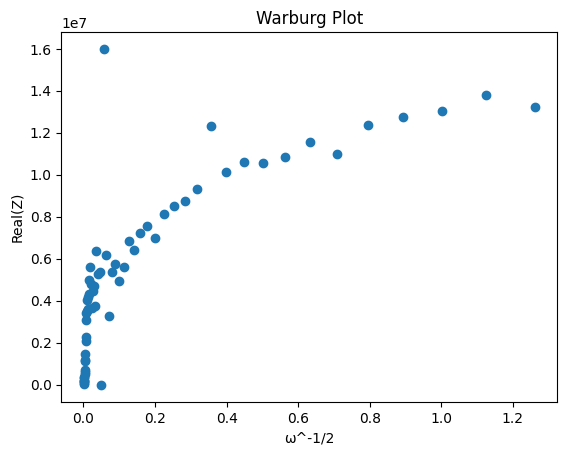

Warburg coefficient (slope): 5.76e+06 Ohm s^(-1/2)
Intercept: 7.70e+06 Ohm
R-squared: 0.67


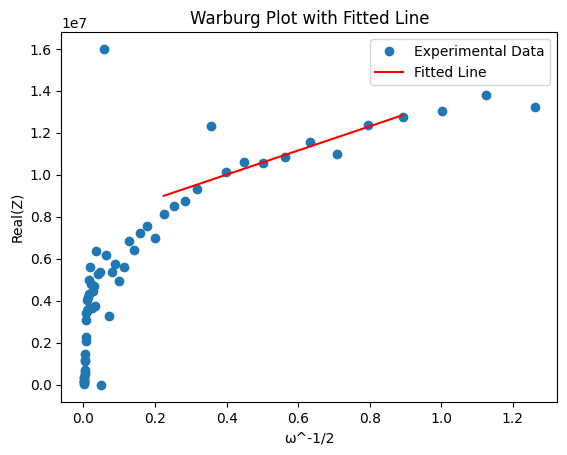

In [16]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Read and preprocess the data
freqs, Z = preprocessing.readZPlot('GY1_htol.z')

# Calculate omega and omega_inv_sqrt
omega = 2 * np.pi * freqs
omega_inv_sqrt = omega**(-0.5)

# Extract the real part of the impedance
Z_real = Z.real

# Plot Z' vs ω^-1/2
plt.plot(omega_inv_sqrt, Z_real, 'o')
plt.ylabel('Real(Z)')
plt.xlabel('ω^-1/2')
plt.title('Warburg Plot')
plt.show()

# Select the linear region
linear_region = (omega_inv_sqrt > 0.2) & (omega_inv_sqrt < 1.0)
selected_omega_inv_sqrt = omega_inv_sqrt[linear_region]
selected_Z_real = Z_real[linear_region]

# Fit a line to the selected region of the data
slope, intercept, r_value, p_value, std_err = linregress(selected_omega_inv_sqrt, selected_Z_real)

# Output the Warburg coefficient and related statistics
print(f"Warburg coefficient (slope): {slope:.2e} Ohm s^(-1/2)")
print(f"Intercept: {intercept:.2e} Ohm")
print(f"R-squared: {r_value**2:.2f}")

# Plot the fitted line on top of the data
plt.plot(omega_inv_sqrt, Z_real, 'o', label='Experimental Data')
plt.plot(selected_omega_inv_sqrt, intercept + slope * selected_omega_inv_sqrt, 'r', label='Fitted Line')
plt.ylabel('Real(Z)')
plt.xlabel('ω^-1/2')
plt.title('Warburg Plot with Fitted Line')
plt.legend()
plt.show()


Low to high

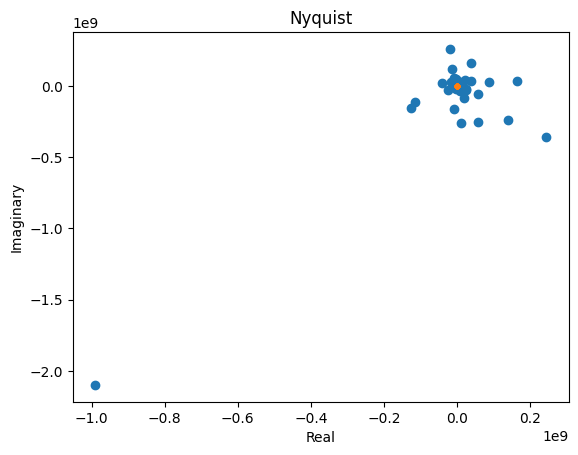

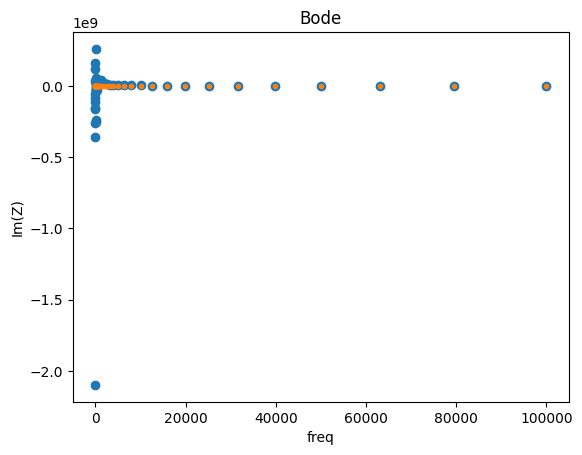

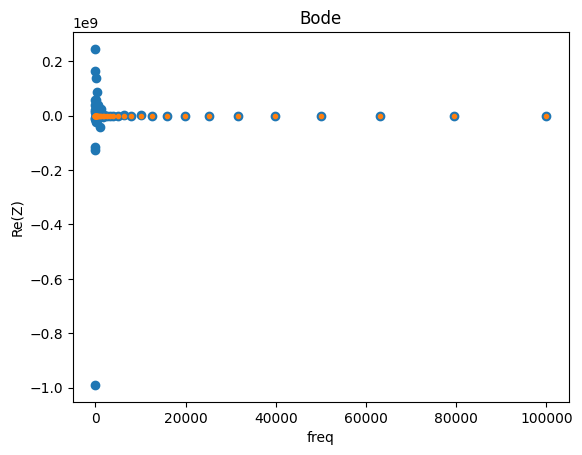

In [ ]:
freqs, Z = preprocessing.readZPlot('YcutLiTaO3-Dryltoh.z')

circuit = 'R0,C0'
init = [0, 10**-24]

circuit = CustomCircuit(circuit, initial_guess=init)
# circuit.fit(freqs, Z)
Z_fit = circuit.predict(freqs)

plt.plot(Z.real, -Z.imag, 'o')
plt.plot(Z_fit.real, -Z_fit.imag, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

plt.plot(freqs, -Z.imag, 'o')
plt.plot(freqs, -Z_fit.imag, '.')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

plt.plot(freqs, Z.real, 'o')
plt.plot(freqs, Z_fit.real, '.')
plt.ylabel('Re(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

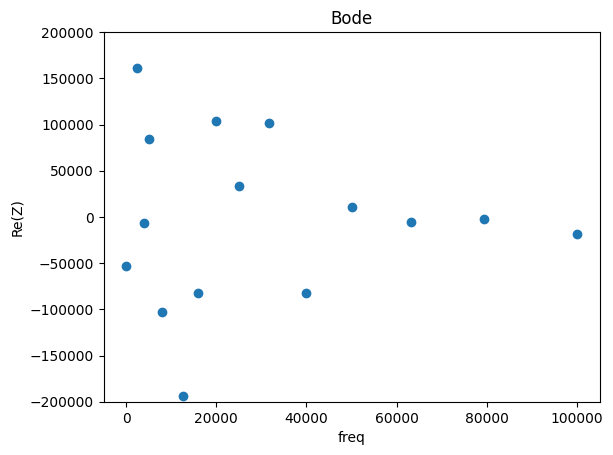

In [ ]:
cut=0
plt.ylim((-2*1e5, 2*1e5))
plt.plot(freqs[cut:], Z.real[cut:], 'o')
plt.ylabel('Re(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

In [ ]:
print(len(freqs))

51
